<a href="https://colab.research.google.com/github/linah73/Price_prediction/blob/main/Terray_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
%matplotlib inline

In [14]:
#load data
df = pd.read_csv('/content/data_exercise.csv')

## Data exploration

In [ ]:
#check the shape of the data 
df.shape

(4569313, 7)

In [ ]:
#check data columns, data types and missing values
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4569313 entries, 0 to 4569312
Data columns (total 7 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   FOV      4569313 non-null  int64  
 1   Bead_ID  4569313 non-null  int64  
 2   BB1      4569312 non-null  object 
 3   BB2      4569312 non-null  object 
 4   BB3      4569312 non-null  object 
 5   BL       4569312 non-null  float64
 6   81nM     4569312 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 244.0+ MB


There are no missing values in any on the columns.

In [ ]:
#Check data frame
df.head()

,FOV,Bead_ID,BB1,BB2,BB3,BL,81nM
0,1,3,CP_692,CP_742,CP_247,108.000474,114.849700
1,1,12,CP_981,CP_482,CP_1123,112.035264,117.157116
2,1,13,CP_781,CP_165,CP_958,110.413860,120.200005
3,1,26,CP_266,CP_986,CP_394,111.415696,115.645036
4,1,28,CP_173,CP_834,CP_310,112.760089,117.613977


In [ ]:
#Check data frame
df.tail()

,FOV,Bead_ID,BB1,BB2,BB3,BL,81nM
4569308,188,18246,CP_119,CP_812,CP_74,115.443242,145.613177
4569309,188,18247,CP_763,CP_905,CP_509,115.706068,143.098141
4569310,188,18250,CP_266,CP_444,CP_54,117.468244,146.319109
4569311,188,18251,CP_876,CP_841,CP_1036,114.667637,143.043256
4569312,188,1,NaN,NaN,NaN,NaN,NaN


In [ ]:

# Check the unique values of the 'FOV' column
df['FOV'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
#If there are  792 FOV we want to check if there are 792 data points for each Bead-ID. 
#Check the number of data points per Bead-ID
df['Bead_ID'].value_counts()

34841    142
17256    139
22445    139
34046    139
39941    139
        ... 
38195     55
39197     54
39799     52
38799     50
39399     48
Name: Bead_ID, Length: 40000, dtype: int64

The number of data points are less than 792 per Bead-ID and seems to vary . 
I assume the reason why the measurement data points is less than the expected "40,000 beads per FOV in a 200 x 200 layout" is because the experimental yield is less than 100% and it varies.

In [ ]:
df['FOV'].value_counts()

186    26824
184    26760
185    26746
180    26734
112    26725
       ...  
58     19522
72     19020
2      15576
146    15036
188    12119
Name: FOV, Length: 188, dtype: int64

In [ ]:
#Check for any duplicated rows
m = df[df.duplicated() == True]
m.shape

(0, 7)

In [ ]:
m.shape

(0, 7)

There are no duplicated rows.

Check the number of unique BB per position.

In [ ]:
df.describe(exclude=[np.number]) 

,BB1,BB2,BB3
count,4569312,4569312,4569312
unique,8,480,768
top,CP_981,CP_1038,CP_821
freq,634241,11224,10068


Visually check if the unique values of the BBs to see if any are seemigly erroneous.

In [ ]:
df['BB1'].unique()

array(['CP_692', 'CP_981', 'CP_781', 'CP_266', 'CP_173', 'CP_119',
       'CP_763', 'CP_876', nan], dtype=object)

In [ ]:
df['BB2'].unique()

array(['CP_742', 'CP_482', 'CP_165', 'CP_986', 'CP_834', 'CP_346',
       'CP_328', 'CP_261', 'CP_981', 'CP_104', 'CP_1006', 'CP_694',
       'CP_947', 'CP_1161', 'CP_418', 'CP_160', 'CP_944', 'CP_774',
       'CP_926', 'CP_220', 'CP_1107', 'CP_170', 'CP_235', 'CP_109',
       'CP_855', 'CP_305', 'CP_1074', 'CP_460', 'CP_872', 'CP_286',
       'CP_875', 'CP_1014', 'CP_692', 'CP_912', 'CP_176', 'CP_129',
       'CP_750', 'CP_55', 'CP_426', 'CP_260', 'CP_1', 'CP_196', 'CP_736',
       'CP_427', 'CP_799', 'CP_152', 'CP_202', 'CP_498', 'CP_1125',
       'CP_23', 'CP_171', 'CP_753', 'CP_537', 'CP_359', 'CP_1159',
       'CP_90', 'CP_262', 'CP_85', 'CP_491', 'CP_192', 'CP_789', 'CP_0',
       'CP_714', 'CP_982', 'CP_122', 'CP_229', 'CP_380', 'CP_1171',
       'CP_341', 'CP_330', 'CP_900', 'CP_1119', 'CP_993', 'CP_63',
       'CP_539', 'CP_937', 'CP_790', 'CP_522', 'CP_334', 'CP_675',
       'CP_766', 'CP_404', 'CP_676', 'CP_461', 'CP_668', 'CP_573',
       'CP_577', 'CP_1137', 'CP_1054', 'CP

In [ ]:
df['BB3'].unique()

array(['CP_247', 'CP_1123', 'CP_958', 'CP_394', 'CP_310', 'CP_586',
       'CP_601', 'CP_520', 'CP_24', 'CP_703', 'CP_155', 'CP_787', 'CP_51',
       'CP_819', 'CP_494', 'CP_343', 'CP_291', 'CP_206', 'CP_972',
       'CP_752', 'CP_26', 'CP_308', 'CP_1011', 'CP_1122', 'CP_659',
       'CP_1013', 'CP_443', 'CP_730', 'CP_571', 'CP_360', 'CP_1032',
       'CP_734', 'CP_614', 'CP_253', 'CP_1222', 'CP_1001', 'CP_492',
       'CP_1076', 'CP_1205', 'CP_112', 'CP_534', 'CP_1234', 'CP_699',
       'CP_20', 'CP_1231', 'CP_829', 'CP_821', 'CP_22', 'CP_80', 'CP_564',
       'CP_300', 'CP_502', 'CP_398', 'CP_992', 'CP_1027', 'CP_515',
       'CP_1126', 'CP_228', 'CP_400', 'CP_191', 'CP_1045', 'CP_595',
       'CP_1232', 'CP_270', 'CP_1083', 'CP_696', 'CP_536', 'CP_612',
       'CP_868', 'CP_4', 'CP_1018', 'CP_921', 'CP_935', 'CP_1179',
       'CP_271', 'CP_356', 'CP_144', 'CP_416', 'CP_644', 'CP_658',
       'CP_974', 'CP_384', 'CP_504', 'CP_454', 'CP_814', 'CP_1169',
       'CP_500', 'CP_1049', 'CP

In [ ]:
#add column with decriptive row identifier name FOV_Bead_ID
df['FOV_BeadID'] = df['FOV'].astype(str) +"-"+ df['Bead_ID'].astype(str)
#Move last column to first
new_cols = ['FOV_BeadID','FOV','Bead_ID','BB1', 'BB2', 'BB3','BL','81nM']
df = df[new_cols]

In [ ]:
df.head()

,FOV_BeadID,FOV,Bead_ID,BB1,BB2,BB3,BL,81nM
0,1-3,1,3,CP_692,CP_742,CP_247,108.000474,114.849700
1,1-12,1,12,CP_981,CP_482,CP_1123,112.035264,117.157116
2,1-13,1,13,CP_781,CP_165,CP_958,110.413860,120.200005
3,1-26,1,26,CP_266,CP_986,CP_394,111.415696,115.645036
4,1-28,1,28,CP_173,CP_834,CP_310,112.760089,117.613977


## Baseline correction

In [ ]:
df['Intensity'] = df['81nM'] - df['BL']

In [ ]:
df.head()

,FOV_BeadID,FOV,Bead_ID,BB1,BB2,BB3,BL,81nM,Intensity
0,1-3,1,3,CP_692,CP_742,CP_247,108.000474,114.849700,6.849226
1,1-12,1,12,CP_981,CP_482,CP_1123,112.035264,117.157116,5.121852
2,1-13,1,13,CP_781,CP_165,CP_958,110.413860,120.200005,9.786146
3,1-26,1,26,CP_266,CP_986,CP_394,111.415696,115.645036,4.229340
4,1-28,1,28,CP_173,CP_834,CP_310,112.760089,117.613977,4.853888


## One-hot-encode

In [ ]:
#One-hot-encode the building blocks columns
df2 = pd.get_dummies(data=df, columns=['BB1', 'BB2', 'BB3'])

In [ ]:
df2.head()

## Anomaly Detection

### Check if there is any bias intensity measurements by FOV

In order to check if there is intensity bias by FOV we can look at distributions of the highest intensity values and lowest values in the 
dataset separately and check if all the FOVs are equally represented. 

In [ ]:
df.describe()

,FOV,Bead_ID,BL,81nM,Intensity
count,1.819693e+07,1.819693e+07,1.819693e+07,1.819693e+07,1.819693e+07
mean,3.844563e+02,1.985068e+04,1.142181e+02,1.486604e+02,3.444231e+01
std,2.279551e+02,1.151027e+04,2.799765e+00,3.999479e+01,3.982897e+01
min,1.000000e+00,1.000000e+00,1.033266e+02,1.146850e+02,-6.477990e+02
25%,1.870000e+02,9.884000e+03,1.122932e+02,1.401007e+02,2.643763e+01
50%,3.740000e+02,1.977100e+04,1.141500e+02,1.450352e+02,3.055335e+01
75%,5.810000e+02,2.978000e+04,1.160612e+02,1.499727e+02,3.495220e+01
max,7.920000e+02,4.000000e+04,7.897129e+02,4.926682e+03,4.817079e+03


In [ ]:
#Intensity values in the lowest range
df_25percent = df[df['Intensity']< np.quantile(df['Intensity'], 0.25)]

In [ ]:
#Let's see which FOVs have the most data points in the lowest range
df_25percent['FOV'].value_counts()

24     13738
22     12899
23     12366
94     11981
19     11756
       ...  
761        8
746        8
749        4
747        3
748        2
Name: FOV, Length: 782, dtype: int64

In [ ]:
#Intensity values in the highest range
df_75percent = df[df['Intensity']> np.quantile(df['Intensity'], 0.75)]

In [ ]:
#Let's see which FOVs have the most data points in the highest range
df_75percent['FOV'].value_counts()

763    26317
762    26316
761    26236
764    25278
765    24969
       ...  
21      1926
51      1914
29      1865
20      1776
24      1757
Name: FOV, Length: 791, dtype: int64

/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


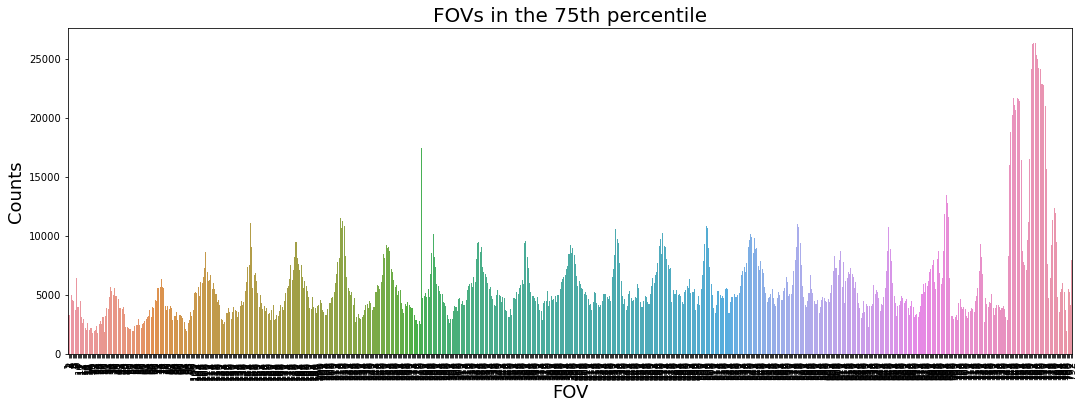

In [ ]:
#Plot FOV counts in the 75th percentile
plt.figure(figsize=(18,6))
sns.countplot(df_75percent['FOV'])
plt.title("FOVs in the 75th percentile", fontsize=20)
plt.xlabel('FOV', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [ ]:
df_75percent81nM = df[df['81nM']> np.quantile(df['81nM'], 0.75)]

/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


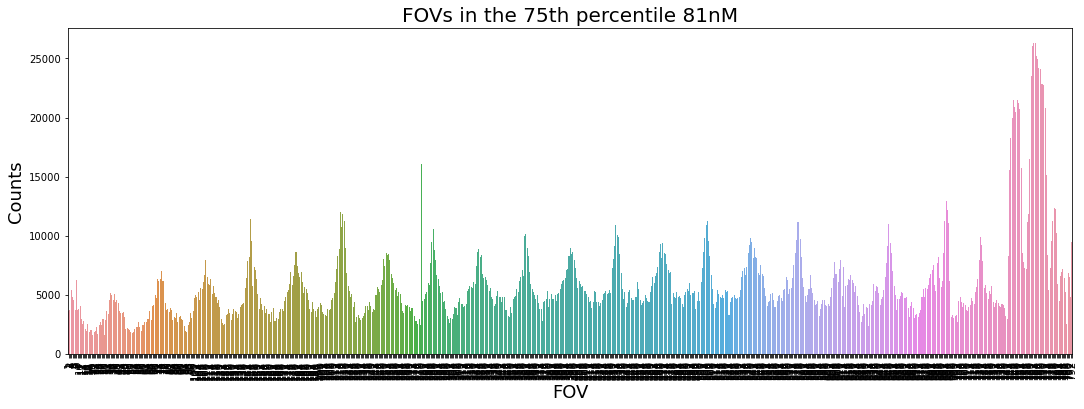

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(df_75percent81nM['FOV'])
plt.title("FOVs in the 75th percentile 81nM", fontsize=20)
plt.xlabel('FOV', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [ ]:
df_75percentBL = df[df['BL']> np.quantile(df['BL'], 0.75)]

/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


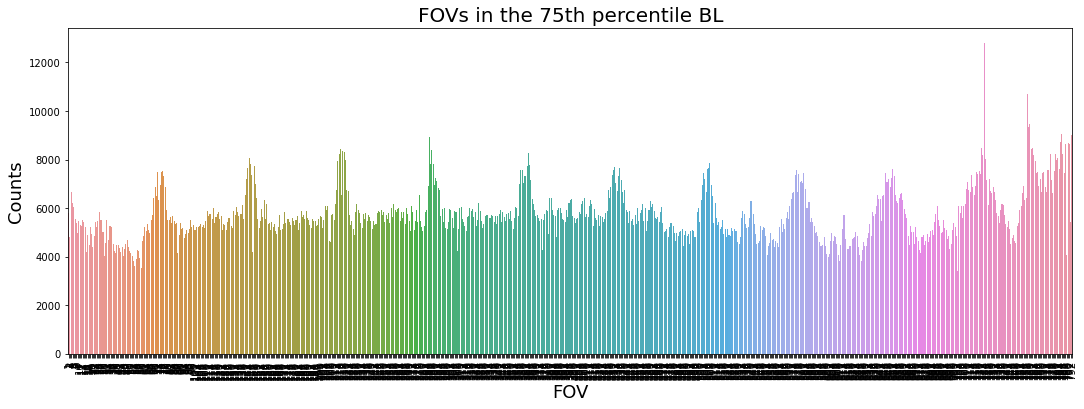

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(df_75percentBL['FOV'])
plt.title("FOVs in the 75th percentile BL", fontsize=20)
plt.xlabel('FOV', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


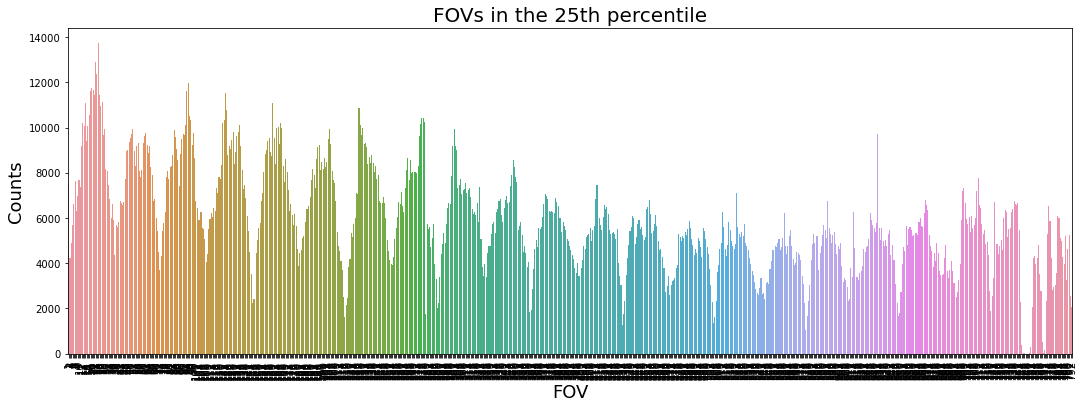

In [ ]:
#Plot FOV counts in the 25th percentile
plt.figure(figsize=(18,6))
sns.countplot(df_25percent['FOV'])
plt.title("FOVs in the 25th percentile", fontsize=20)
plt.xlabel('FOV', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

There appears to be some bias in the intensity measurements. Some FOVs appear to have more intensities scoring high. The distribution would be equal if there was no bias.

In [ ]:
df.describe()

,FOV,Bead_ID,BL,81nM,Intensity
count,1.819693e+07,1.819693e+07,1.819693e+07,1.819693e+07,1.819693e+07
mean,3.844563e+02,1.985068e+04,1.142181e+02,1.486604e+02,3.444231e+01
std,2.279551e+02,1.151027e+04,2.799765e+00,3.999479e+01,3.982897e+01
min,1.000000e+00,1.000000e+00,1.033266e+02,1.146850e+02,-6.477990e+02
25%,1.870000e+02,9.884000e+03,1.122932e+02,1.401007e+02,2.643763e+01
50%,3.740000e+02,1.977100e+04,1.141500e+02,1.450352e+02,3.055335e+01
75%,5.810000e+02,2.978000e+04,1.160612e+02,1.499727e+02,3.495220e+01
max,7.920000e+02,4.000000e+04,7.897129e+02,4.926682e+03,4.817079e+03


/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


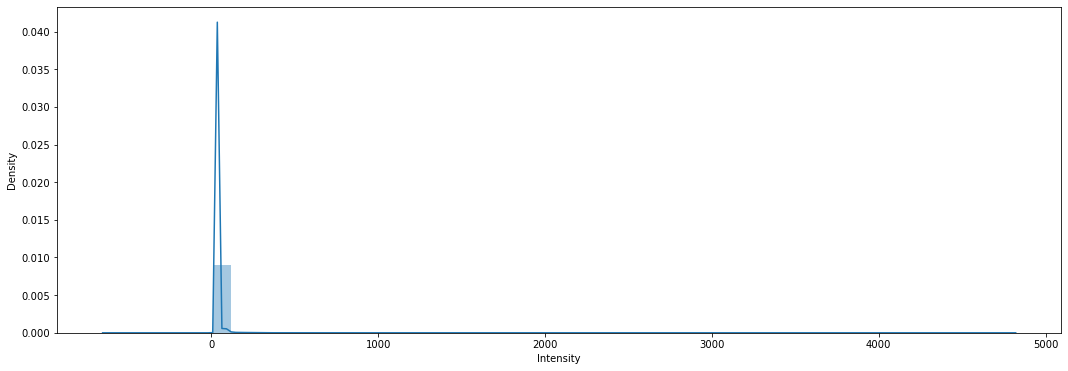

In [ ]:
#Distibution of Intensity
plt.figure(figsize=(18,6))
sns.distplot(df['Intensity'])
plt.show()

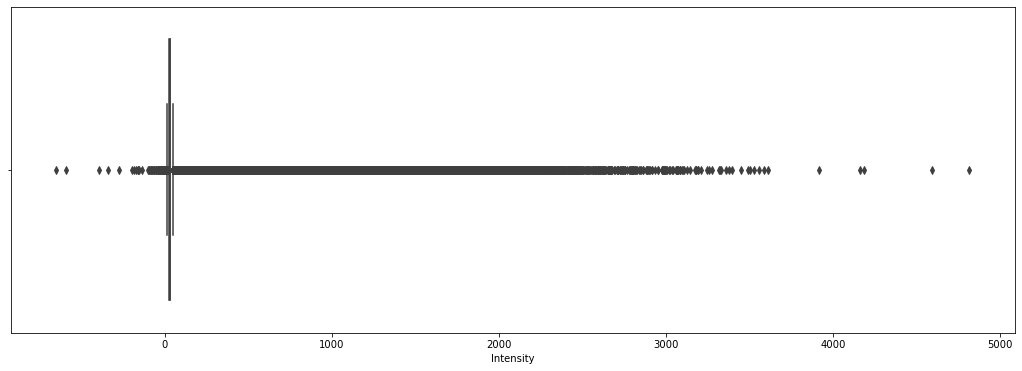

In [ ]:
#Boxplot of all Intensity measurements
plt.figure(figsize=(18,6))
sns.boxplot(x=df['Intensity'])
plt.show()

In [ ]:
#Let's look at the distribution for one FOV sample
temp_df = df[df['FOV'] == 153]

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26097 entries, 3644800 to 3670896
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FOV_BeadID  26097 non-null  object 
 1   FOV         26097 non-null  int64  
 2   Bead_ID     26097 non-null  int64  
 3   BB1         26097 non-null  object 
 4   BB2         26097 non-null  object 
 5   BB3         26097 non-null  object 
 6   BL          26097 non-null  float64
 7   81nM        26097 non-null  float64
 8   Intensity   26097 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.0+ MB


/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


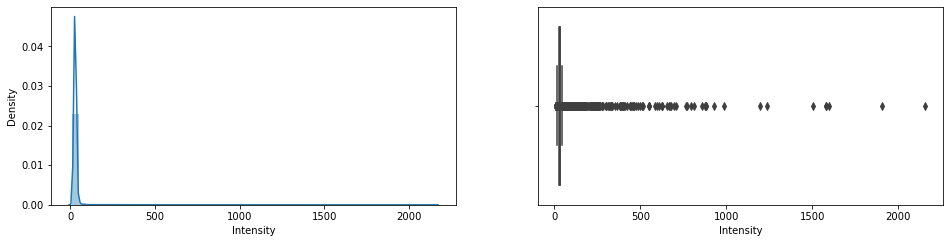

In [ ]:
#Distribution of intensity for FOV 153
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(temp_df['Intensity'])
plt.subplot(2,2,2)
sns.boxplot(temp_df['Intensity'])
plt.show()

In [ ]:
#Now let's look at the distribution for one Bead sample
temp_df2 = df[df['Bead_ID'] == 10]

In [ ]:
temp_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 20209 to 18163681
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FOV_BeadID  452 non-null    object 
 1   FOV         452 non-null    int64  
 2   Bead_ID     452 non-null    int64  
 3   BB1         452 non-null    object 
 4   BB2         452 non-null    object 
 5   BB3         452 non-null    object 
 6   BL          452 non-null    float64
 7   81nM        452 non-null    float64
 8   Intensity   452 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 35.3+ KB


/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


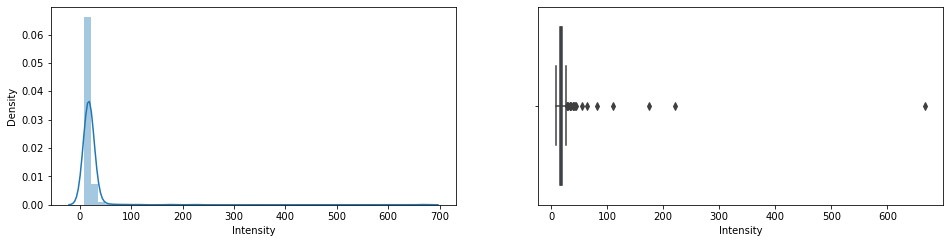

In [ ]:
#Distribution of intensity for Bead_ID 10
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(temp_df2['Intensity'])
plt.subplot(2,2,2)
sns.boxplot(temp_df2['Intensity'])
plt.show()

There are a few anomaly detection methods are normally used for outlier detection inclluding Z scores,
box plots and unsupervised ML methods. In this instance, since the data is not normally distributed, the most suitable and simplest to detect outliers in the intensity data is a boxplot. Outliers are points that are less than the Min(Q1 - 1.5 x IQR) or greater than Max(Q3 + 1.5 x IQR)
We need to define a funtion that selects outliers in a data set.


In order to avoid removing hits that are misidentified as outliers, we can first group the data by Bead-ID, and then detect outliers for each bead-ID. We can define a function that does this.

In [ ]:
# Detect the outliers
def outlierDetector(col):  
    Q3 = np.quantile( col, 0.75)
    Q1 = np.quantile( col, 0.25)
    IQR = Q3 - Q1
    Min = Q1 - 1.5 * IQR
    Max = Q3 + 1.5 * IQR
    if col > Min and col < Max:
        outlier = 0
    else: 
        outlier = 1
        
    return outlier
 
 


In [15]:
df.head()

,FOV,Bead_ID,BB1,BB2,BB3,BL,81nM
0,1,3,CP_692,CP_742,CP_247,108.000474,114.849700
1,1,12,CP_981,CP_482,CP_1123,112.035264,117.157116
2,1,13,CP_781,CP_165,CP_958,110.413860,120.200005
3,1,26,CP_266,CP_986,CP_394,111.415696,115.645036
4,1,28,CP_173,CP_834,CP_310,112.760089,117.613977


In [16]:
Q1 = df["81nM"].quantile(0.25)
Q3 = df["81nM"].quantile(0.75)
IQR = np.diff(df["81nM"].quantile([0.25,0.75]))[0]
S = 1.5*IQR
print(Q1, Q3, IQR, S)

140.1007197929667 149.9727437910035 9.87202399803681 14.808035997055214


In [17]:
def iqr(x):
  S = 1.5*IQR
  if x < Q1 - S or x > Q3 + S:
      return False
  else:
      return True

In [19]:
df_groupedby_Bead_ID = df.groupby("Bead_ID")

In [23]:

temp = df_groupedby_Bead_ID.get_group(4)
temp["isOutlier"]= temp["81nM"].apply(iqr)
temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FOV,Bead_ID,BB1,BB2,BB3,BL,81nM,isOutlier
80587,5,4,CP_692,CP_923,CP_440,109.922482,129.758076,True
199622,10,4,CP_692,CP_616,CP_1223,107.709487,123.197717,False
224662,11,4,CP_266,CP_590,CP_79,110.408738,137.590372,True
274316,13,4,CP_119,CP_722,CP_995,108.658847,124.675808,False
367883,17,4,CP_266,CP_922,CP_137,105.890516,136.995045,True
...,...,...,...,...,...,...,...,...
17939320,780,4,CP_266,CP_479,CP_1185,112.181722,125.874367,True
17961963,781,4,CP_876,CP_1030,CP_78,107.458066,123.922655,False
18004932,783,4,CP_173,CP_209,CP_576,109.092984,126.012073,True
18142425,790,4,CP_266,CP_506,CP_35,108.307508,130.000930,True


In [11]:
df["isOutlier"]= df["81nM"].apply(iqr)

In [12]:
df.head()

,FOV,Bead_ID,BB1,BB2,BB3,BL,81nM,isOutlier
0,1,3,CP_692,CP_742,CP_247,108.000474,114.849700,False
1,1,12,CP_981,CP_482,CP_1123,112.035264,117.157116,False
2,1,13,CP_781,CP_165,CP_958,110.413860,120.200005,False
3,1,26,CP_266,CP_986,CP_394,111.415696,115.645036,False
4,1,28,CP_173,CP_834,CP_310,112.760089,117.613977,False


In [ ]:
In [2272]: conditions = [df.daily_visitors > df.groupby('store_id')['daily_visitors'].transform('quantile', 0.75), df.daily_visitors < df.groupby('store_id')['daily_visitors'].transform('quantile', 0.25)]

In [2273]: choices = [1,1]

In [2276]: df['outlier'] = np.select(conditions, choices)


AttributeError: 'DataFrame' object has no attribute 'daily_visitors'

In [ ]:
df3 = df
df3['outlier'] = df.groupby('Bead_ID')['Intensity'].apply(outlierDetector)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df.head()

,FOV,Bead_ID,BB1,BB2,BB3,BL,81nM,Intensity,Outlier,outlier
0,1,3,CP_692,CP_742,CP_247,108.000474,114.849700,6.849226,1.0,1.0
1,1,12,CP_981,CP_482,CP_1123,112.035264,117.157116,5.121852,1.0,1.0
2,1,13,CP_781,CP_165,CP_958,110.413860,120.200005,9.786146,1.0,1.0
3,1,26,CP_266,CP_986,CP_394,111.415696,115.645036,4.229340,1.0,1.0
4,1,28,CP_173,CP_834,CP_310,112.760089,117.613977,4.853888,1.0,1.0


In [ ]:

df['Outlier'] = df.groupby('Bead_ID')['Intensity'].apply(iqr)

In [ ]:
df.head()

,FOV,Bead_ID,BB1,BB2,BB3,BL,81nM,Intensity,Outlier
0,1,3,CP_692,CP_742,CP_247,108.000474,114.849700,6.849226,6.849226
1,1,12,CP_981,CP_482,CP_1123,112.035264,117.157116,5.121852,1.000000
2,1,13,CP_781,CP_165,CP_958,110.413860,120.200005,9.786146,9.786146
3,1,26,CP_266,CP_986,CP_394,111.415696,115.645036,4.229340,1.000000
4,1,28,CP_173,CP_834,CP_310,112.760089,117.613977,4.853888,1.000000


In [ ]:
df.head(15)

,FOV,Bead_ID,BB1,BB2,BB3,BL,81nM,Intensity,Outlier
0,1,3,CP_692,CP_742,CP_247,108.000474,114.849700,6.849226,1.0
1,1,12,CP_981,CP_482,CP_1123,112.035264,117.157116,5.121852,1.0
2,1,13,CP_781,CP_165,CP_958,110.413860,120.200005,9.786146,1.0
3,1,26,CP_266,CP_986,CP_394,111.415696,115.645036,4.229340,1.0
4,1,28,CP_173,CP_834,CP_310,112.760089,117.613977,4.853888,1.0
5,1,32,CP_981,CP_346,CP_586,114.606011,119.978622,5.372611,1.0
6,1,37,CP_119,CP_328,CP_601,111.144844,117.724606,6.579763,1.0
7,1,38,CP_763,CP_261,CP_520,113.715053,120.394527,6.679474,1.0
8,1,40,CP_692,CP_981,CP_24,112.174185,123.030435,10.856250,1.0
9,1,41,CP_876,CP_104,CP_247,109.389844,120.155707,10.765863,1.0


In [ ]:
def filter_by_FOV(data, x):
    """
    this fuction filters the dataframe by just the FOV
    it inputes the FOV = x and the data frame to be filtered 
    """
    temp_df = data[data['FOV'] == x]
    
    return temp_df

def filter_by_BeadID(data, y):
    """
    this fuction filters the dataframe by just the Bead_ID
    it inputes the Bead_ID = y and the data frame to be filtered 
    """
    temp_df = data[data['Bead_ID'] == y]

def filter_by_FOV_and_BeadID(data, x,y):
    """
    this fuction inputes the FOV = x and the Bead_ID = y and use these to filter the dataframe
    and the data frame to be filtered 
    it returns a filtered dataframe
    """
    temp_df = data[data['FOV'] == x]
    temp_df = temp_df[temp_df['Bead_ID'] == y]
    return temp_df


In [ ]:
# model specification
model1 = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02)
# model fitting
y_pred = model1.fit_predict(df)
# filter outlier index
outlier_index = where(y_pred == -1) # negative values are outliers and positives inliers
# filter outlier values
outlier_values = df.iloc[outlier_index]
# plot data
plt.scatter(df["x"], df["y"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["x"], outlier_values["y"], color = "r")

## Isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
X = df.drop(columns=['FOV_BeadID', '81nM', 'BL'])
y = df['Intensity']

In [ ]:
X_ohe = df2.drop(columns=['FOV_BeadID','Bead_ID', '81nM', 'BL'])
y = df['Intensity']

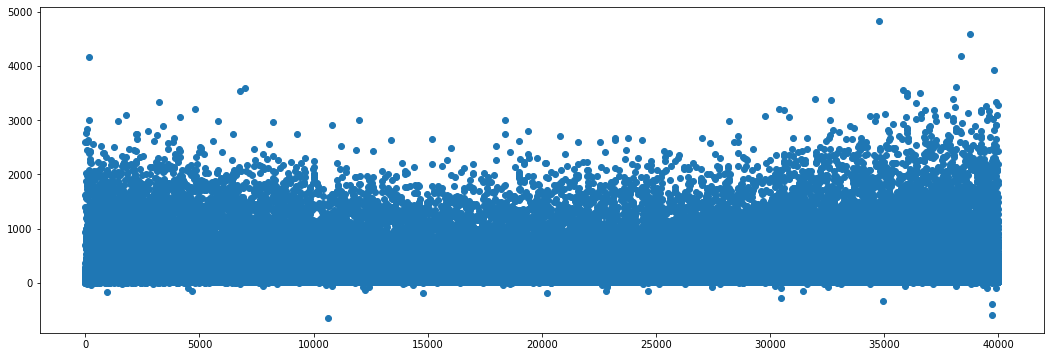

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(df['Bead_ID'], df['Intensity'])
plt.show()

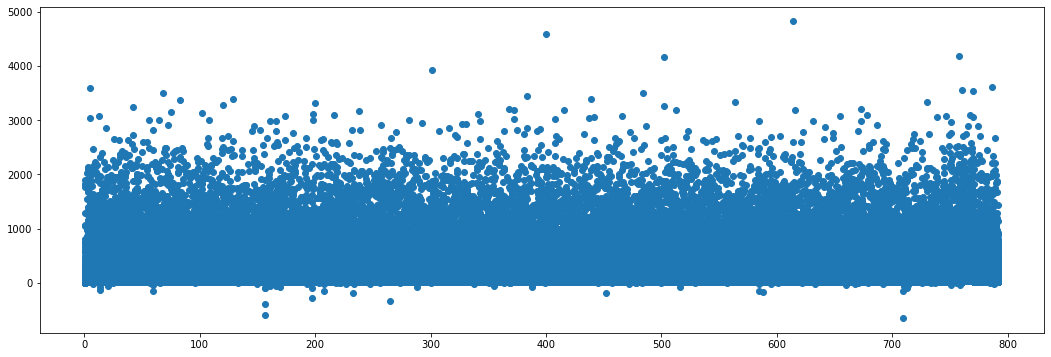

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(df['FOV'], df['Intensity'])
plt.show()

In [ ]:
iforest = IsolationForest(n_estimators = 100, contamination = 0.03, max_samples ='auto')
pred = iforest.fit_predict(X_ohe)
print(pred[:20])
print("Number of outliers detected: {}".format(pred[pred < 0].sum()))
print("Number of normal samples detected: {}".format(pred[pred > 0].sum()))

In [ ]:
normal_data = data[np.where(prediction > 0)]
outliers = data[np.where(prediction < 0)]
plt.scatter(normal_data[:, 0], normal_data[:, 1])
plt.scatter(outliers[:, 0], outliers[:, 1])
plt.title("Random data points with outliers identified.")
plt.show()

In [ ]:
score = iforest.decision_function(data)
data_scores = pd.DataFrame(list(zip(data[:, 0],data[:, 1],score)),columns = ['X','Y','Anomaly Score'])
display(data_scores.head())

In [ ]:
top_5_outliers = data_scores.sort_values(by = ['Anomaly Score']).head()
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(top_5_outliers['X'], top_5_outliers['Y'])
plt.title("Random data points with only 5 outliers identified.")
plt.show()

### Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

In [ ]:
X = df2.drop(columns=['FOV_BeadID','Bead_ID', '81nM', 'BL'])
y = df2['Intensity']

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:

# model 
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)

 # model fitting
y_pred = lof.fit_predict(X)
# filter outlier index
lofs_index=where(y_pred==-1)

# filter outlier values
values = X[lofs_index]


In [ ]:
plt.scatter(X['FOV'], X['Intensity'])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

In [ ]:

model = LocalOutlierFactor(n_neighbors=20) 
print(model)  
model.fit_predict(X) 
 
lof = model.negative_outlier_factor_
thresh = quantile(lof, .03)
print(thresh) 
 
index = where(lof<=thresh)
values = X[index]

plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()